# INFO 370 PS7
*Name: Brian Park*

List your collaborators here:
1. Jae Sang Woo

In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Logistic regression (75pt)

#### 1.1 Descriptive statistics (20pt)

1. (1pt) Load data. The data should contain 303 rows, and 14 columns.
2. (3pt) Do some basic checks. Do we have any missing values? What are the data types? What are ranges of numeric variables, and possible values of categorical variables? What is the percentage of heart attack among these patients? Compare the values with documentation and comment what do you see.
3. (5pt) You probably noticed that all the above variables are coded as numbers. However, not all of these are in fact of numeric (interval, ratio) measure type. Which variables above are inherently nominal or ordinal, not numeric? Hint: 1.1.1 Measures: Possible Mathematical Operations explains the measure types.
4. (6pt) Before we do any more serious work: create a very simple model (“naive model”) that predicts everyone the same result (attack or no attack), whichever category is more common in data (the majority category). How would the confusion matrix of this model look like? What are the corresponding accuracy, precision and recall? Explain! Note: you should not fit any model here, you are able to compute these all these values manually with just a calculator!
5. (5pt) Below, you are going to construct different models to diagnose heart attack. What do you think: which of the four indicators, accuracy, precision, recall, or f-score, is the best for model evaluation here? Hint: think in terms of its applicability in medicine

In [422]:
#1.1-1
ht = pd.read_csv("../data/heart.csv.bz2", sep=",")
ht.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [423]:
#1.1-1
ht.shape

(303, 14)

In [424]:
#1.1-2
ht.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [425]:
#1.1-2
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [426]:
#1.1-2
for i in range(0, ht.shape[1]):
    print(ht.columns[i] + '[min]: ' + str(ht.iloc[:, i].min()))
    print(ht.columns[i] + '[max]: ' + str(ht.iloc[:, i].max()))
    print()

age[min]: 29
age[max]: 77

sex[min]: 0
sex[max]: 1

cp[min]: 0
cp[max]: 3

trtbps[min]: 94
trtbps[max]: 200

chol[min]: 126
chol[max]: 564

fbs[min]: 0
fbs[max]: 1

restecg[min]: 0
restecg[max]: 2

thalachh[min]: 71
thalachh[max]: 202

exng[min]: 0
exng[max]: 1

oldpeak[min]: 0.0
oldpeak[max]: 6.2

slp[min]: 0
slp[max]: 2

caa[min]: 0
caa[max]: 4

thall[min]: 0
thall[max]: 3

output[min]: 0
output[max]: 1



Based on the basic checks above and the documentation, `sex`, `cp`, `fbs`, `restecg`, `exng`,  `caa`, and `output` variables can possibly have categorical values.

In [427]:
#1.1-2
ht[ht.output == 1].count().output / ht.output.count() * 100

54.45544554455446

54% patients have a heart attack.

In [428]:
#1.1-3

`sex`, `cp`, `exng`, `restecg`, and `output` variables are inherently nominal measures.

`fbs`, and `caa` variables are inherently ordinal measures.

In [429]:
#1.1-4
ht.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [430]:
#1.1-4
ht["extra"] = 1
TP = ht[(ht.extra == 1) & (ht.output == 1)].shape[0]
TN = ht[(ht.extra == 0) & (ht.output == 0)].shape[0]
FP = ht[(ht.extra == 1) & (ht.output == 0)].shape[0]
FN = ht[(ht.extra == 0) & (ht.output == 1)].shape[0]
TP, TN, FP, FN

(165, 0, 138, 0)

| | **Predicted** | |
| -------- | ------------: | ------:|
| | No Attack (N) | Attack (P) |
|**Actual**| 0 | 138 |
| | 0 | 165 |

In [431]:
a = (165 + 0) / (165 + 0 + 0 + 138)
p = 165 / (165 + 138)
r = 165 / (165 + 0)

a, p, r

(0.5445544554455446, 0.5445544554455446, 1.0)

The confusion matrix of this model only has TP and FP since we predict that everyone has a heart attack.

In [432]:
#1.1-5

In [433]:
TP / (TP + 0.5 * (FP + FN)) #f-score

0.7051282051282052

Based on the computation above, recall is the best for model evaluation here. Since we predict that everyone has a heart attack, true negative and false negative cannot exist and must not exist to accurately predict a heart attack. The formula of recall will only consider true values or having a heart attack even if we predict it wrong. Therefore, in terms of the applicability in medicine, recall will be the best fit for the model evaluation here.

#### 1.2 Data preparation (15pt)

1. (4pt) First, extract the design matrix X and the outcome vector y.
2. (7pt) Now convert all categorical variables in your X into dummies.
3. (6pt) Split your data into training (75%) and validation (25%) chunks.

In [434]:
#1.2-1
y = ht.output.values
X = ht.iloc[:, 0:13].values
X[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [435]:
#1.2-2
X = pd.get_dummies(ht.iloc[:, 0:13], 
    columns = ["sex", "cp", "fbs", 'restecg', 'exng']).values
X[:5]

array([[ 63. , 145. , 233. , 150. ,   2.3,   0. ,   0. ,   1. ,   0. ,
          1. ,   0. ,   0. ,   0. ,   1. ,   0. ,   1. ,   1. ,   0. ,
          0. ,   1. ,   0. ],
       [ 37. , 130. , 250. , 187. ,   3.5,   0. ,   0. ,   2. ,   0. ,
          1. ,   0. ,   0. ,   1. ,   0. ,   1. ,   0. ,   0. ,   1. ,
          0. ,   1. ,   0. ],
       [ 41. , 130. , 204. , 172. ,   1.4,   2. ,   0. ,   2. ,   1. ,
          0. ,   0. ,   1. ,   0. ,   0. ,   1. ,   0. ,   1. ,   0. ,
          0. ,   1. ,   0. ],
       [ 56. , 120. , 236. , 178. ,   0.8,   2. ,   0. ,   2. ,   0. ,
          1. ,   0. ,   1. ,   0. ,   0. ,   1. ,   0. ,   0. ,   1. ,
          0. ,   1. ,   0. ],
       [ 57. , 120. , 354. , 163. ,   0.6,   2. ,   0. ,   2. ,   1. ,
          0. ,   1. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   1. ,
          0. ,   0. ,   1. ]])

In [436]:
#1.2-3
from sklearn.model_selection import train_test_split

Xt, Xv, yt, yv = train_test_split(X, y, test_size = 0.25)

#### 1.3 Modeling and evaluation (20pt)

1. (5pt) Now use logistic regression (from sklearn package) to model heart attack using all the variables. Construct the logistic regression object and fit it. Use only training data for fitting! Hint: you may get a convergence warning. You may get rid of it if you increase the max iterations to 1000 or so.
2. (2pt) As a first quick check, compute accuracy on training data.
3. (4pt) Predict outcome and compute confusion matrix on validation data
4. (5pt) Finally, use (10-fold) cross-validation to evaluate the same model. Report only the statistic that you considered most important in question 1.1.5 Remember: feed all data, not just training data to cross-validation.
5. (4pt) Comment your results. How do the results on training and validation data compare? Does CV produce results that are similar to validation results? Did you find CV being slower or easier to use that training-validation split?

In [437]:
#1.3-1
from sklearn.linear_model import LogisticRegression

m = LogisticRegression(max_iter = 2000)
_ = m.fit(Xt, yt)

In [438]:
#1.3-2
yhat = m.predict(Xt)
from sklearn.metrics import accuracy_score 

accuracy_score(yt, yhat)

0.8590308370044053

In [439]:
#1.3-3
yhat = m.predict(Xv)
from sklearn.metrics import confusion_matrix

accuracy_score(yv, yhat), confusion_matrix(yv, yhat)

(0.8289473684210527,
 array([[28,  9],
        [ 4, 35]]))

In [440]:
#1.3-4
from sklearn.model_selection import cross_val_score

cv = cross_val_score(m, X, y, cv = 10, scoring = "recall")

np.mean(cv) #Ave recall

0.8650735294117646

In [441]:
#1.3-5

The result on training data has a better accuracy than that on validation data. CV produces results similar to training data rather than validation data. After comparison, I found CV being slower to compute accuracy with training-validation split.

#### 1.4 How confident are we in our predictions? (20pt)

1. (1pt) Fit the model with training data only again (just to be sure there is no leftover fits from elsewhere).
2. (4pt) Predict the probability of having a heart attack P(output = 1|x) for everyone in validation data. Note: we only need probability of heart attack, not probability of non-heart attack! Hint: Python Notes 12.2.4 discusses predicting logistic regression results with sklearn.
3. (5pt) Display the predicted probabilities on a histogram. Comment the histogram: how often are we confident in our predictions (predicted probability close to 0 or 1) and how often are we uncertain (predicted probability close to 0.5)?
4. (4pt) How let’s convert these probabilities into categories (heart attack or not)–find probabilities that are larger than 0.5.
5. (2pt) Display the confusion matrix. Hint: you should get exactly the same matrix as in Q 1.3.??.
6. (5pt) Explain why do you get exactly the same confusion matrix.

In [442]:
#1.4-1
_ = m.fit(Xt, yt)

In [443]:
#1.4-2
phat = m.predict_proba(Xv)

phat = phat[:,1] #probability of heart attack
phat

array([0.9377076 , 0.87654016, 0.00279645, 0.94616477, 0.72754398,
       0.0990776 , 0.77119028, 0.97791808, 0.00565305, 0.79153427,
       0.06165281, 0.01349194, 0.555173  , 0.00899998, 0.89573905,
       0.15467803, 0.94592536, 0.28915473, 0.7230043 , 0.24568278,
       0.02263703, 0.59618804, 0.10525483, 0.87945915, 0.95880718,
       0.9838803 , 0.95558931, 0.02118494, 0.5694591 , 0.37511166,
       0.3153844 , 0.93036536, 0.79893515, 0.00937618, 0.97779013,
       0.88202513, 0.86570427, 0.95801602, 0.80439049, 0.72436659,
       0.10844165, 0.91896716, 0.14276029, 0.05482239, 0.61157157,
       0.63728833, 0.95945505, 0.81936559, 0.04848662, 0.7148695 ,
       0.20114744, 0.0217638 , 0.61912605, 0.65441971, 0.02026178,
       0.75042017, 0.41097548, 0.89131187, 0.28412736, 0.79498541,
       0.16579125, 0.97429421, 0.85946264, 0.44271833, 0.35460219,
       0.08473088, 0.74211363, 0.61478619, 0.88149285, 0.24705452,
       0.15539654, 0.095774  , 0.98098714, 0.84843878, 0.06637

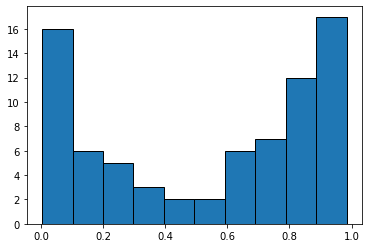

In [444]:
#1.4-3
_ = plt.hist(phat, edgecolor = "black")

Based on the histogram above, we are quite confident in our prediction because the majority of values are close to 0 or 1 while only a few values are located near 0.5.

In [445]:
#1.4-4
phat[phat > 0.5] = 1
phat[phat <= 0.5] = 0
phat

array([1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 1.])

In [469]:
#1.4-4
phat[phat == 1].sum() / len(phat)

0.5789473684210527

In [470]:
#1.4-5
confusion_matrix(yv, phat)

array([[28,  9],
       [ 4, 35]])

In [447]:
#1.4-6

The reason why I get exactly the same confusion matrix is crosstab basically did the same calculation as the confusion matrix.

## 2. Other models (25pt)

#### 2.1 Nearest neighbors (15pt)|

1. (3pt) Fit a 1-NN model on training data (use the same training data, do not split again).
2. (2pt) Predict outcome and compute confusion matrix on validation data
3. (2pt) Do a (10-fold) cross-validation to evaluate the same model. Report only the statistic that you considered most important in question 1.1.5 Remember: feed all data, not just training data to cross-validation.
4. (2pt) Repeat with 5-NN
5. (2pt) And repeat with your own k.
6. (4pt) Comment your results. Which k is the best? Do these models perform better than the logistic? Do they feel slower or faster?

In [479]:
#2.1-1
from sklearn.neighbors import KNeighborsClassifier

k = 1
m = KNeighborsClassifier(k)
_ = m.fit(Xt, yt)

In [480]:
#2.1-2
yhat = m.predict(Xv)

confusion_matrix(yv, yhat)

array([[15, 22],
       [14, 25]])

In [481]:
#2.1-3
cv = cross_val_score(m, X, y, cv = 10, scoring = "recall")

np.mean(cv) #Ave recall

0.6621323529411764

In [482]:
#2.1-4
k = 5
m = KNeighborsClassifier(k)
cv = cross_val_score(m, X, y, cv = 10, scoring = "recall")

np.mean(cv) #Ave recall

0.7158088235294118

In [484]:
#2.1-5
k = 15
m = KNeighborsClassifier(k)

cv = cross_val_score(m, X, y, cv = 10, scoring = "recall")

np.mean(cv) #Ave recall

0.7327205882352941

In [453]:
#2.1-6

Based on the results above, k=15 had the best result. I think that these models performed better than logistics because it was faster than logistics.

#### 2.2 Decision trees (10pt)

Finally, repeat the previous question, Q 2.1, with decision trees using 3 values for max depth: 2, 3 and
4.

In [511]:
#depth: 2
from sklearn.tree import DecisionTreeClassifier

m = DecisionTreeClassifier(max_depth = 2)
_ = m.fit(Xt, yt)
yhat = m.predict(Xv)

confusion_matrix(yv, yhat)

array([[21, 16],
       [ 8, 31]])

In [513]:
#depth: 2
cv = cross_val_score(m, X, y, cv = 10, scoring = "recall")

np.mean(cv) #Ave recall

0.8827205882352942

In [515]:
#depth: 3
m = DecisionTreeClassifier(max_depth = 3)

cv = cross_val_score(m, X, y, cv = 10, scoring = "recall")

np.mean(cv) #Ave recall

0.8529411764705882

In [ ]:
#depth: 4
m = DecisionTreeClassifier(max_depth = 4)

cv = cross_val_score(m, X, y, cv = 10, scoring = "recall")

np.mean(cv) #Ave recall

0.8161764705882353

#### How much time did you spend on this PS?

I spent 10 hours to finish this PS.